In [1]:
# Import relevant packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
import time

In [2]:
os.getcwd()

'C:\\Users\\robur\\Documents\\Thesis\\code\\lcfMapping\\markov'

In [3]:
# Read in excel files
pred2015 = pd.read_csv("../../data/output/wurChange/predictions-2015-median.csv")
pred2016 = pd.read_csv("../../data/output/wurChange/predictions-2016-median.csv")
pred2017 = pd.read_csv("../../data/output/wurChange/predictions-2017-median.csv")
pred2018 = pd.read_csv("../../data/output/wurChange/predictions-2018-median.csv")
classes = list(pred2015.columns)

pred2015

,tree,shrub,grassland,crops,urban_built_up,bare,water
0,0.000000,2.352941,68.235294,0.000000,29.411765,0.000000,0.0
1,25.327511,6.550218,68.122271,0.000000,0.000000,0.000000,0.0
2,3.947368,23.684211,59.210526,0.000000,0.000000,13.157895,0.0
3,0.000000,8.333333,6.666667,0.000000,75.000000,10.000000,0.0
4,12.987013,14.285714,72.727273,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...
30484,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
30485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
30486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
30487,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.0


In [4]:
for i in range(len(classes)):
    print(classes[i])

tree
shrub
grassland
crops
urban_built_up
bare
water


In [5]:
i=1; j=1
# i=6; j=2 #(100,50,15,3)
print("2015:", pred2015.iloc[i][j])
print("2016:", pred2016.iloc[i][j])
print("2017:", pred2017.iloc[i][j])
print("2018:", pred2018.iloc[i][j])

2015: 6.55021834061135
2016: 10.1694915254237
2017: 19.672131147541
2018: 20.0


In [ ]:
## Start of Markov chain building

In [ ]:
## Pseudo-Code concept

# Concept of all code
"""
for 1:30.000 points
    
    for 1:7 classes:
        
        for n times:
            2015
                optimise
            2016
                optimise
            2017
                optimise
            2018
                optimise
"""

# Concept of all code with params
"""
pred2015
pred2016
pred2017
pred2018

for 1:30.000 points (i):
    
    pred2015.iloc[i]
    pred2016.iloc[i]
    pred2017.iloc[i]
    pred2018.iloc[i]
    
    for 1:7 classes (j):
        pred2015.iloc[i][j]
        pred2016.iloc[i][j]
        pred2017.iloc[i][j]
        pred2018.iloc[i][j]
        
        for n times:
            2015
                optimise
            2016
                optimise
            2017
                optimise
            2018
                optimise
"""

RF-values:
 2015: 10.7142857142857
 2016: 7.74193548387097
 2017: 7.93650793650794
 2018: 8.47457627118644

After smoothing...
 Final node 2015: 9.7142857142857
 Final node 2016: 8.74193548387097
 Final node 2017: 7.93650793650794
 Final node 2018: 8.47457627118644 

Total run time 0.0033240318298339844
Part run time 0.0


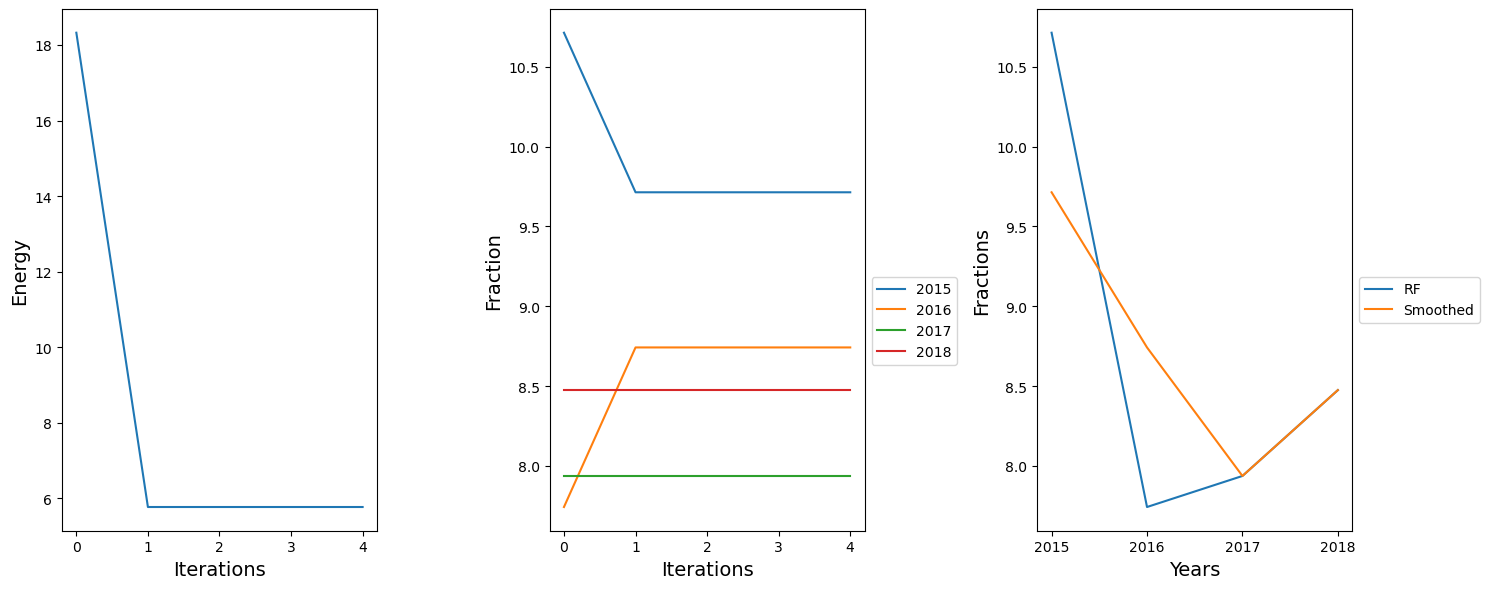

In [7]:
""" 
for 1:7 classes (j):
        pred2015.iloc[i][j]
        pred2016.iloc[i][j]
        pred2017.iloc[i][j]
        pred2018.iloc[i][j]
        
        for n times:
            2015
                optimise
            2016
                optimise
            2017
                optimise
            2018
                optimise
"""

# for 1:7 classes (j):
t0 = time.time() # timer

i=1383
j=1

# initialise
rf2015 = pred2015.iloc[i][j]
rf2016 = pred2016.iloc[i][j]
rf2017 = pred2017.iloc[i][j]
rf2018 = pred2018.iloc[i][j]
print("RF-values:")
print(" 2015:", rf2015)
print(" 2016:", rf2016)
print(" 2017:", rf2017)
print(" 2018:", rf2018)

node2015 = rf2015
node2016 = rf2016
node2017 = rf2017
node2018 = rf2018

stepsize = 1
plot = True

nodeSim2015 = []
nodeSim2016 = []
nodeSim2017 = []
nodeSim2018 = []
nodeSim2015.append(node2015)
nodeSim2016.append(node2016)
nodeSim2017.append(node2017)
nodeSim2018.append(node2018)

t1 = time.time() # timer

eTotal = []
eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                edges = ((rf2015,node2016),(rf2016,node2015,node2017),
                                         (rf2017,node2016,node2018),(rf2018,node2017))))
e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                edges = ((rf2015,node2016),(rf2016,node2015,node2017),
                                         (rf2017,node2016,node2018),(rf2018,node2017)))

t2 = time.time() # timer

for k in range(10):
    
#     if k == 2:
#         stepsize = 0.1
    
    if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
        break
    
    node2015 = optimise_node(node2015, edges=(rf2015,node2016), stepsize=stepsize)
    nodeSim2015.append(node2015)
    
    node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), stepsize=stepsize)
    nodeSim2016.append(node2016)
    
    node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), stepsize=stepsize)
    nodeSim2017.append(node2017)
    
    node2018 = optimise_node(node2018, edges=(rf2018,node2017), stepsize=stepsize)
    nodeSim2018.append(node2018)
    
    nodes = (node2015, node2016, node2017, node2018)
    edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
    e = calc_total_energy(nodes,edges)
    eTotal.append(e)
    

print("\nAfter smoothing...")

print(" Final node 2015:", node2015)
print(" Final node 2016:", node2016)
print(" Final node 2017:", node2017)
print(" Final node 2018:", node2018,"\n")

# print(" Node sim 2015:", [round(elem, 1) for elem in nodeSim2015])
# print(" Node sim 2016:", [round(elem, 1) for elem in nodeSim2016])
# print(" Node sim 2017:", [round(elem, 1) for elem in nodeSim2017])
# print(" Node sim 2018:", [round(elem, 1) for elem in nodeSim2018])
# print(" Energy sim", [round(elem, 1) for elem in eTotal])

t3 = time.time() # timer

print("Total run time", t3 - t0)
print("Part run time", t2 - t1)



if plot == True:
    plot_simulations(eTotal, nodeSim2015, nodeSim2016, nodeSim2017, nodeSim2018)

In [8]:
# Set up
smooth2015 = []
smooth2016 = []
smooth2017 = []
smooth2018 = []
t0 = time.time() # timer

# Optimise all 30k points
#for i in range(len(pred2015)):
for i in range(1000):
    
    # List to save updated values in dictionary per class
    listofdicts = []

    # Optimise class by class
    for j in classes:

        # Locate basic RF-values
        rf2015 = pred2015.iloc[i][j]
        rf2016 = pred2016.iloc[i][j]
        rf2017 = pred2017.iloc[i][j]
        rf2018 = pred2018.iloc[i][j]

        # Intialise node's values
        node2015 = rf2015
        node2016 = rf2016
        node2017 = rf2017
        node2018 = rf2018

        # Stepsize to find optimal fraction
        stepsize = 1
        plot = False

        # Keep track of nodes over iterations (useful to check with plot=True)
        nodeSim2015 = []
        nodeSim2016 = []
        nodeSim2017 = []
        nodeSim2018 = []
        nodeSim2015.append(node2015)
        nodeSim2016.append(node2016)
        nodeSim2017.append(node2017)
        nodeSim2018.append(node2018)

        # Keep track of total energy over iterations (necessary) (useful to check with plot=True)
        eTotal = []
        eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                        edges = ((rf2015,node2016),(rf2016,node2015,node2017),
                                                 (rf2017,node2016,node2018),(rf2018,node2017))))
        e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                        edges = ((rf2015,node2016),(rf2016,node2015,node2017),
                                                 (rf2017,node2016,node2018),(rf2018,node2017)))


        # Iterations over one chain
        for k in range(10):

            # Stop if total energy remains stable 3 iterations in a row
            if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
                break

            # Optimise node's value of 2015
            node2015 = optimise_node(node2015, edges=(rf2015,node2016), stepsize=stepsize)
            nodeSim2015.append(node2015)

            # Optimise node's value of 2016
            node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), stepsize=stepsize)
            nodeSim2016.append(node2016)

            # Optimise node's value of 2017
            node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), stepsize=stepsize)
            nodeSim2017.append(node2017)

            # Optimise node's value of 2018
            node2018 = optimise_node(node2018, edges=(rf2018,node2017), stepsize=stepsize)
            nodeSim2018.append(node2018)

            # Calculate and store new total energy
            nodes = (node2015, node2016, node2017, node2018)
            edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
            e = calc_total_energy(nodes,edges)
            eTotal.append(e)


        # add class values to listofdicts
        dict1 = {"2015": node2015, "2016": node2016, "2017": node2017, "2018": node2018}
        listofdicts.append(dict1)

    # save per point updated values from listofdicts
    smooth2015.append([dict1["2015"] for dict1 in listofdicts])
    smooth2016.append([dict1["2016"] for dict1 in listofdicts])
    smooth2017.append([dict1["2017"] for dict1 in listofdicts])
    smooth2018.append([dict1["2018"] for dict1 in listofdicts])

# Timer
t1 = time.time()
print(round(t1 - t0, 1), "sec.")

# Lists to df
smooth2015 = pd.DataFrame(smooth2015, columns=classes)
smooth2016 = pd.DataFrame(smooth2016, columns=classes)
smooth2017 = pd.DataFrame(smooth2017, columns=classes)
smooth2018 = pd.DataFrame(smooth2018, columns=classes)

# Replace <0 and >100 values before normalisation
smooth2015[smooth2015 < 0] = 0
smooth2015[smooth2015 > 100] = 100
smooth2016[smooth2016 < 0] = 0
smooth2016[smooth2016 > 100] = 100
smooth2017[smooth2017 < 0] = 0
smooth2017[smooth2017 > 100] = 100
smooth2018[smooth2018 < 0] = 0
smooth2018[smooth2018 > 100] = 100

# Normalise all classes to add up to 100%
smooth2015 = smooth2015.div(smooth2015.sum(axis=1), axis=0) * 100
smooth2016 = smooth2016.div(smooth2016.sum(axis=1), axis=0) * 100
smooth2017 = smooth2017.div(smooth2017.sum(axis=1), axis=0) * 100
smooth2018 = smooth2018.div(smooth2018.sum(axis=1), axis=0) * 100

# Replace NaN values with 0 (NaN resulting from normalisation)
smooth2015 = smooth2015.replace(np.nan, 0)
smooth2016 = smooth2016.replace(np.nan, 0)
smooth2017 = smooth2017.replace(np.nan, 0)
smooth2018 = smooth2018.replace(np.nan, 0)

print("Done")

6.7 sec.
Done


In [31]:
smooth2015.to_csv("../../data/output/markov/smooth2015-basic.csv",index=False)
smooth2016.to_csv("../../data/output/markov/smooth2016-basic.csv",index=False)
smooth2017.to_csv("../../data/output/markov/smooth2017-basic.csv",index=False)
smooth2018.to_csv("../../data/output/markov/smooth2018-basic.csv",index=False)

In [10]:
[dict1["2015"] for dict1 in listofdicts]

[2.46913580246914, 25.6296296296296, 71.9012345679012, 0.0, 0.0, 0.0, 0.0]

In [11]:
listofdicts

[{'2015': 2.46913580246914,
  '2016': 2.54777070063694,
  '2017': 1.8985507246376798,
  '2018': 1.0},
 {'2015': 25.6296296296296,
  '2016': 22.203821656051,
  '2017': 15.9420289855072,
  '2018': 10.71428571428571},
 {'2015': 71.9012345679012,
  '2016': 76.2484076433121,
  '2017': 82.1594202898551,
  '2018': 88.2857142857143},
 {'2015': 0.0, '2016': 0.0, '2017': 0.0, '2018': 0.0},
 {'2015': 0.0, '2016': 0.0, '2017': 0.0, '2018': 0.0},
 {'2015': 0.0, '2016': 0.0, '2017': 0.0, '2018': 0.0},
 {'2015': 0.0, '2016': 0.0, '2017': 0.0, '2018': 0.0}]

In [75]:
t0 = time.time()
#other2015 = point_data.loc[2015,otherClasses]

calc_energy(node2015, (rf2015,node2016))#, other2015)

t1 = time.time()
print("Runt time:", t1-t0)

Runt time: 0.0009922981262207031


In [5]:
# optimise_node

def optimise_node(node, edges, stepsize=5):

    # describe edges
    # 2 edges: rf2015 + node2016
    e = calc_energy(node, edges)
    
    # Create empty list to keep track of energy
    eSim = []
    eSim.append(e)
    #print("Initial Energy:", eSim[0])

    #print("Start simulation...")
    node = minimise_energy(node, edges, eSim, stepsize)
    #print("New node:", node)
    #print("Energy:", eSim)
    
    
    return node

In [4]:
def calc_energy(node, edges):
    
    edge1 = edges[0]
    edge2 = edges[1]
    
    e1 = (node - edge1)**2
    e2 = (node - edge2)**2
    
    if len(edges) == 3:
        edge3 = edges[2]
        e3 = (node - edge3)**2
        return e1 + e2 + e3
    
    return e1 + e2


def minimise_energy(node, edges, eSim, stepsize):
    
    i = 0
    #print(i)
    
    if calc_energy(node + stepsize, edges) < eSim[i]:
        node = node + stepsize
        i += 1
        eSim.append(calc_energy(node, edges))
        
        while calc_energy(node + stepsize, edges) < eSim[i]:
            node = node + stepsize
            i += 1
            eSim.append(calc_energy(node,edges))
        
    elif calc_energy(node - stepsize, edges) < eSim[i]:
        node = node - stepsize
        i += 1
        eSim.append(calc_energy(node, edges))
        
        while calc_energy(node - stepsize, edges) < eSim[i]:
            node = node - stepsize
            i += 1
            eSim.append(calc_energy(node, edges))
    
    return node


def calc_total_energy(nodes, edges):
    
    node2015 = nodes[0]
    node2016 = nodes[1]
    node2017 = nodes[2]
    node2018 = nodes[3]
    edges2015 = edges[0]
    edges2016 = edges[1]
    edges2017 = edges[2]
    edges2018 = edges[3]
    
    e2015 = calc_energy(node2015, edges2015)
    e2016 = calc_energy(node2016, edges2016)
    e2017 = calc_energy(node2017, edges2017)
    e2018 = calc_energy(node2018, edges2018)
    
    return e2015 + e2016 + e2017 + e2018
    

In [6]:
def plot_simulations(eTotal, nodeSim2015, nodeSim2016, nodeSim2017, nodeSim2018):

    # Plot energy over iterations
    xs = [x for x in range(len(eTotal))]
    plt.figure(figsize=(15,6), dpi= 100)
    plt.subplot(1, 3, 1)
    plt.plot(xs, eTotal)
    plt.ylabel('Energy', fontsize=14)
    plt.xlabel('Iterations', fontsize=14)

    # Plot nodes over iterations
    xs = [x for x in range(len(nodeSim2015))]
    plt.subplot(1, 3, 2)
    plt.plot(xs, nodeSim2015)
    plt.plot(xs, nodeSim2016)
    plt.plot(xs, nodeSim2017)
    plt.plot(xs, nodeSim2018)
    plt.ylabel('Fraction', fontsize=14)
    plt.xlabel('Iterations', fontsize=14)
    plt.legend(["2015","2016","2017","2018"], loc="upper left", bbox_to_anchor=(1, 0.5))

    xs = ["2015","2016","2017","2018"]
    yRF = [rf2015,rf2016,rf2017,rf2018]
    yNode = [node2015,node2016,node2017,node2018]
    plt.subplot(1, 3, 3)
    plt.plot(xs, yRF)
    plt.plot(xs, yNode)
    plt.ylabel('Fractions', fontsize=14)
    plt.xlabel('Years', fontsize=14)
    plt.legend(["RF","Smoothed"], loc="upper left", bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()

RF-values:
      tree     shrub  grassland       crops  urban_built_up  bare  water
2015   0.0  0.000000  12.244898   87.755102             0.0   0.0    0.0
2016   0.0  1.515152  98.484848    0.000000             0.0   0.0    0.0
2017   0.0  0.000000  56.976744   43.023256             0.0   0.0    0.0
2018   0.0  0.000000   0.000000  100.000000             0.0   0.0    0.0

New values:
      tree     shrub  grassland      crops  urban_built_up  bare  water
2015   0.0  0.000000  36.244898  63.755102             0.0   0.0    0.0
2016   0.0  0.515152  60.484848  39.000000             0.0   0.0    0.0
2017   0.0  0.000000  46.976744  53.023256             0.0   0.0    0.0
2018   0.0  0.000000  23.000000  77.000000             0.0   0.0    0.0


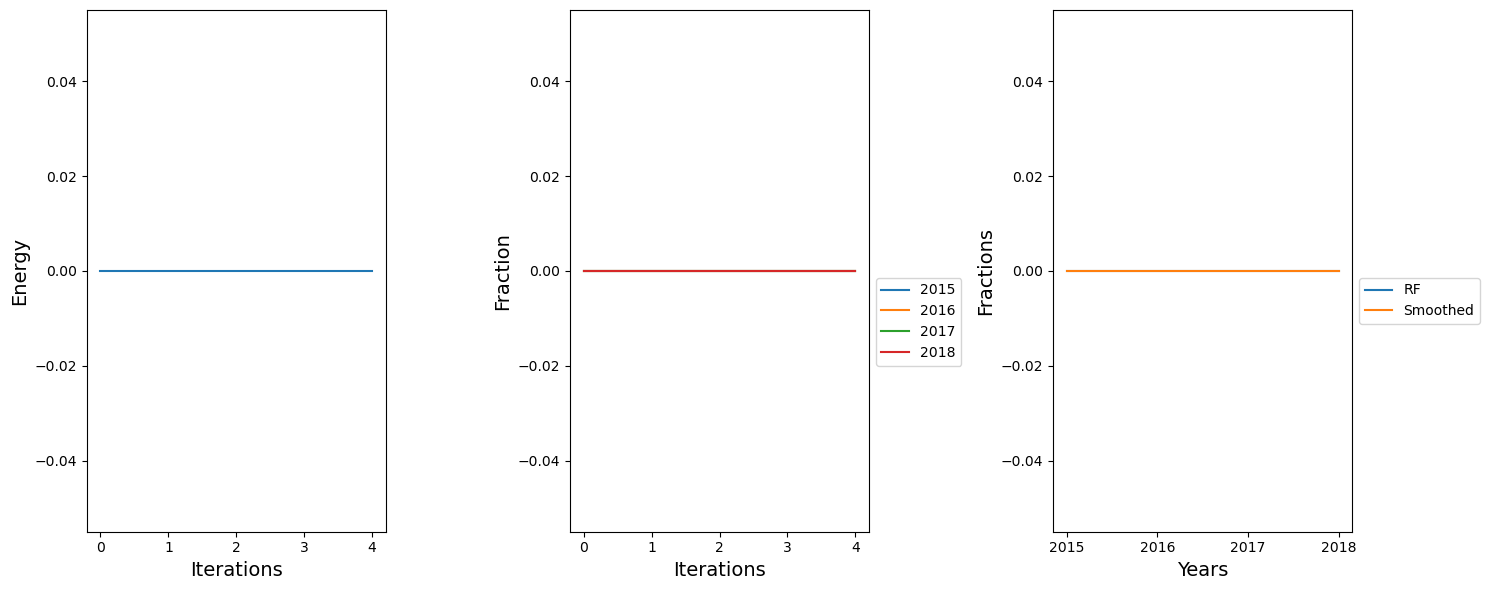

In [9]:

i=30488

point_data = pd.DataFrame([pred2015.iloc[i],pred2016.iloc[i],pred2017.iloc[i],pred2018.iloc[i]], 
                          index=[2015, 2016, 2017, 2018])
print("RF-values:")
print(point_data.to_string())
#      tree shrub grass crops ... 
# 2015
# 2016
# 2017
# 2018

# for j in classes:...
#j=1
for j in range(len(classes)):
    
    #initialise
    rf2015 = point_data[classes[j]].iloc[0]
    rf2016 = point_data[classes[j]].iloc[1]
    rf2017 = point_data[classes[j]].iloc[2]
    rf2018 = point_data[classes[j]].iloc[3]

    
    node2015 = rf2015
    node2016 = rf2016
    node2017 = rf2017
    node2018 = rf2018

    # Stepsize to find optimal fraction
    stepsize = 1
    plot = True

    # Keep track of nodes over iterations (useful to check with plot=True)
    nodeSim2015 = []
    nodeSim2016 = []
    nodeSim2017 = []
    nodeSim2018 = []
    nodeSim2015.append(node2015)
    nodeSim2016.append(node2016)
    nodeSim2017.append(node2017)
    nodeSim2018.append(node2018)

    # Within-year classes
    otherClasses = classes[:j] + classes[j+1:]
    #print("\nOther classes:", otherClasses)
    other2015 = point_data.loc[2015,otherClasses]
    other2016 = point_data.loc[2016,otherClasses]
    other2017 = point_data.loc[2017,otherClasses]
    other2018 = point_data.loc[2018,otherClasses]

    eTotal = []
    eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                    edges = ((rf2015,node2016),
                                             (rf2016,node2015,node2017),
                                             (rf2017,node2016,node2018),
                                             (rf2018,node2017))))

    e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                          edges = ((rf2015,node2016),
                                   (rf2016,node2015,node2017),
                                   (rf2017,node2016,node2018),
                                   (rf2018,node2017)))
    #print(e) # now edges_wihtin implemented in calc_energy and calc_total_energy
    # todo: implement in optimise_node and minimise_node -> done


    # Iterations over one chain
    for k in range(10):

        # Stop if total energy remains stable 3 iterations in a row
        if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
            break

        # Optimise node's value of 2015
        node2015 = optimise_node(node2015, edges=(rf2015,node2016), stepsize=stepsize)
        nodeSim2015.append(node2015)

        # Optimise node's value of 2016
        node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), stepsize=stepsize)
        nodeSim2016.append(node2016)

        # Optimise node's value of 2017
        node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), stepsize=stepsize)
        nodeSim2017.append(node2017)

        # Optimise node's value of 2018
        node2018 = optimise_node(node2018, edges=(rf2018,node2017), stepsize=stepsize)
        nodeSim2018.append(node2018)

        # Calculate and store new total energy
        nodes = (node2015, node2016, node2017, node2018)
        edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
        e = calc_total_energy(nodes,edges)
        eTotal.append(e)

    # print(" Final node 2015:", node2015)
    # print(" Final node 2016:", node2016)
    # print(" Final node 2017:", node2017)
    # print(" Final node 2018:", node2018,"\n")

    # update point_data with optimised nodes
    point_data[classes[j]].iloc[0] = node2015
    point_data[classes[j]].iloc[1] = node2016
    point_data[classes[j]].iloc[2] = node2017
    point_data[classes[j]].iloc[3] = node2018

print("\nNew values:")
print(point_data.to_string())

# Now done for one class
# TODO: make it applicable for all classes of this point
if plot == True:
    plot_simulations(eTotal, nodeSim2015, nodeSim2016, nodeSim2017, nodeSim2018)